# Trabalho Prático 1
## Grupo:
* Gabriel Alves Reis, 
* Gabriel Castelo Branco Rocha Alencar Pinto, 2020006523
* Samuel Brísio, 


In [111]:
%pip3 install pandas

UsageError: Line magic function `%pip3` not found.


1- Envoltória Convexa (Gift Wrapping ??)
- Implementar primitiva de posição relativa de semiretas
- Sorted (default do python) com nossa primitiva
- Algoritmo da Envoltória (Gift Wrapping)
    - (conj. de pontos) -> (conj. de pontos)
- função para visualizar a envoltória

In [112]:
from numpy import sort


class Dot:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __repr__(self):
        return f'({self.x}, {self.y})'

    def __lt__(self, other):
        return ( self.x*other.y - (self.y * other.x) ) > 0
    

    def orientacaoRelativa(dot0, dot1, dot2):
        '''Define se: P0P1 está dir/esq de P0P2
            -1 esquerda (P1 anti-horáio a P2 )
            0 colinear
            1 direita (P1 horário a P2)
        '''
        a = (dot1.x - dot0.x)*(dot2.y - dot0.y)
        b = (dot2.x - dot0.x)*(dot1.y - dot0.y)

        signal = -1 if (a < b) else 1
        signal = signal if a != b else 0

        return signal

    def sort(self, dots):
        anchor = dots[0];
        # find anchor
        for p in dots:
            if p.y < anchor.y :
                anchor = p
            elif (p.y == anchor.y and p.x < anchor.x) :
                anchor = p  
        return sorted(dots, key = lambda x, y: self.orientacaoRelativa(anchor, x, y))

In [113]:
from filecmp import cmp
from random import randint

def sortDotsByPolarAngle(dots):
    anchor = dots[0]
    # find anchor
    for p in dots:
        if p.y < anchor.y :
            anchor = p
        elif (p.y == anchor.y and p.x < anchor.x) :
            anchor = p  
    return dots.sort(cmp = lambda x, y: Dot.orientacaoRelativa(anchor, x, y))

lista = []
for i in range(15):
    x = randint(0,100)
    y = randint(0,100)
    lista.append(Dot(x, y))

In [119]:
import pygame

SCREEN = WIDTH, HEIGHT = 300, 300
CELLSIZE = 20
PADDING = 20
ROWS = COLS = (WIDTH - 4*PADDING) # CELLSIZE

pygame.init()
win = pygame.display.set_mode(SCREEN)

# Colors
WHITE = (255, 255, 255)
RED = (255, 0, 0)
YELLOW = (255, 255, 0)
BLACK = (12, 12, 12)

running = True
while running:
    win.fill(BLACK)
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        
    for dot in lista:
        pygame.draw.circle(win, RED, (dot.x, dot.y), 2)
        pygame.time.delay(500)
    pygame.display.update()

pygame.quit()

In [116]:
x = []
y = []
for e in lista:
    x.append(e.x)
    y.append(e.y)

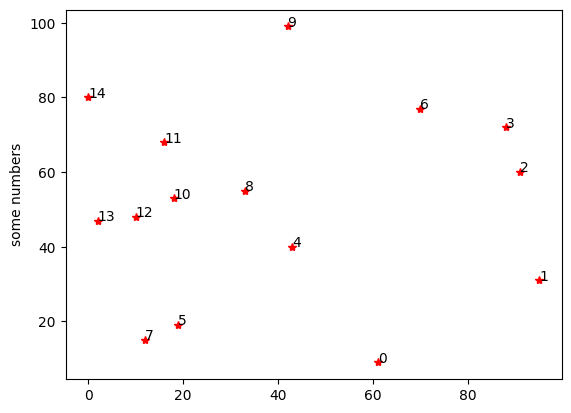

In [117]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(x, y, 'r*')

for i, txt in enumerate(range(len(x))):
    ax.annotate(txt, (x[i], y[i]))
plt.ylabel('some numbers')
plt.show()